<a href="https://colab.research.google.com/github/PradeepKumarM30/WinterSemester2020-21/blob/DeepLearning/20MAI0030EX3/AlexNet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Write a program to implement the AlexNet model (Note : You can use any publically available dataset for testing). While implementing you have to show following things:**

# **Step 1 : Add Necessary Imports**

In [79]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout, Flatten,\
 Conv2D, MaxPooling2D
from keras.layers.normalization import BatchNormalization
import numpy as np
from keras.datasets import cifar10
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from keras.utils import to_categorical


In [11]:
#The repository for dataset
pip install tflearn


     |████████████████████████████████| 112kB 13.5MB/s 
  Created wheel for tflearn: filename=tflearn-0.5.0-cp37-none-any.whl size=127301 sha256=73e122ec7096a4195726a8fd19d91790f65f5d6c8782c4bd0e82981b1f66c8d7
  Stored in directory: /root/.cache/pip/wheels/31/d2/ed/fb9a0d301dd9586c11e9547120278e624227f22fd5f4baf744
Successfully built tflearn


# **Step 2. Load dataset**

In [80]:
import tflearn.datasets.oxflower17 as oxflower17
x, y = oxflower17.load_data(one_hot=True)

x_train,x_val,y_train,y_val=train_test_split(x,y,test_size=.3)


# **Q. NO 1.2 Display the total images in the database, size of the image, no of classes in the database.**
# **Step 3 : Verify Dimensions**

In [81]:
print((x_train.shape,y_train.shape))
print((x_val.shape,y_val.shape))
print((x.shape,y.shape))

((952, 224, 224, 3), (952, 17))
((408, 224, 224, 3), (408, 17))
((1360, 224, 224, 3), (1360, 17))


# **Q .1.1. Display sample input and output images (at least 10 images).**

Text(0.5, 1.0, 'SAMPLE 10, y = 6')

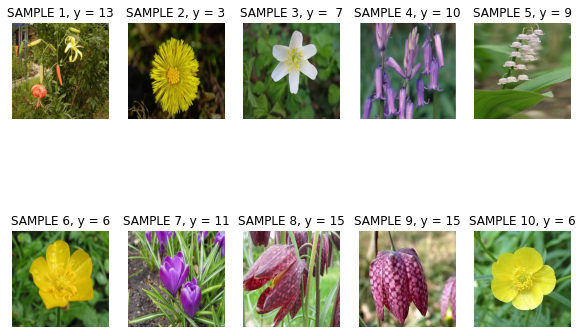

In [82]:
fig = plt.figure(figsize=(10, 7))
rows = 2
columns = 5
fig.add_subplot(rows, columns, 1)

plt.imshow(x_train[100])
plt.axis('off')
plt.title("SAMPLE 1, y = " + str(np.where(y_train[100,:] == 1)[0][0]))

fig.add_subplot(rows, columns, 2)

plt.imshow(x_train[200])
plt.axis('off')
plt.title("SAMPLE 2, y = "+ str(np.where(y_train[200,:] == 1)[0][0]))
  
fig.add_subplot(rows, columns, 3)
  
plt.imshow(x_train[300])
plt.axis('off')
plt.title("SAMPLE 3, y =  "+ str(np.where(y_train[300,:] == 1)[0][0]))
  
fig.add_subplot(rows, columns, 4)
  
plt.imshow(x_train[400])
plt.axis('off')
plt.title("SAMPLE 4, y = "+ str(np.where(y_train[400,:] == 1)[0][0]))

fig.add_subplot(rows, columns, 5)

plt.imshow(x_train[500])
plt.axis('off')
plt.title("SAMPLE 5, y = "+  str(np.where(y_train[500,:] == 1)[0][0]))

fig.add_subplot(rows, columns, 6)

plt.imshow(x_train[600])
plt.axis('off')
plt.title("SAMPLE 6, y = "+  str(np.where(y_train[600,:] == 1)[0][0]))

fig.add_subplot(rows, columns, 7)

plt.imshow(x_train[700])
plt.axis('off')
plt.title("SAMPLE 7, y = "+  str(np.where(y_train[700,:] == 1)[0][0]))

fig.add_subplot(rows, columns, 8)

plt.imshow(x_train[800])
plt.axis('off')
plt.title("SAMPLE 8, y = "+  str(np.where(y_train[800,:] == 1)[0][0]))

fig.add_subplot(rows, columns, 9)

plt.imshow(x_train[33])
plt.axis('off')
plt.title("SAMPLE 9, y = "+  str(np.where(y_train[33,:] == 1)[0][0]))

fig.add_subplot(rows, columns, 10)

plt.imshow(x_train[44])
plt.axis('off')
plt.title("SAMPLE 10, y = "+  str(np.where(y_train[44,:] == 1)[0][0]))

# **STEP 4 : Develop and train model(AlexNet)**

# **Q.NO1.4.Display the training accuracy / training error (Modify the epochs for better accuracy)**

In [87]:
model = Sequential()

layer1 = Conv2D(filters=96, input_shape=(224,224,3), kernel_size=(11,11),strides=(4,4), padding='valid')
model.add(layer1)
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2), padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256,kernel_size=(5,5),strides=(1,1),padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(3,3),strides=(2,2),padding='valid'))
model.add(BatchNormalization())

model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=384,kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(filters=256,kernel_size=(3,3),strides=(1,1),padding='valid'))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2),padding='same'))
model.add(BatchNormalization())

model.add(Flatten())
model.add(Dense(4096, input_shape=(224,224,3,)))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(4096))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(1000))
model.add(Activation('relu'))
model.add(Dropout(0.4))
model.add(BatchNormalization())

model.add(Dense(17))
model.add(Activation('softmax'))

model.summary()

model.compile(loss='categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

model.fit(x_train, y_train, batch_size=64, epochs=20, verbose=1, shuffle=True)




Model: "sequential_15"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 54, 54, 96)        34944     
_________________________________________________________________
activation_46 (Activation)   (None, 54, 54, 96)        0         
_________________________________________________________________
max_pooling2d_22 (MaxPooling (None, 27, 27, 96)        0         
_________________________________________________________________
batch_normalization_42 (Batc (None, 27, 27, 96)        384       
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 23, 23, 256)       614656    
_________________________________________________________________
activation_47 (Activation)   (None, 23, 23, 256)       0         
_________________________________________________________________
max_pooling2d_23 (MaxPooling (None, 11, 11, 256)     

# **Q.NO.1.3 Display the first convolution function kernel filter coefficient values**

In [86]:
model.layers[0].get_weights()

[array([[[[-2.43204832e-02, -2.99645122e-02, -2.07927022e-02, ...,
            2.11981107e-02,  2.57571619e-02,  1.68308858e-02],
          [-6.23030448e-03, -2.05845889e-02, -2.88987029e-02, ...,
            7.97122344e-03,  1.36520844e-02,  2.70704273e-02],
          [ 2.60470295e-03,  1.24210333e-02,  2.49377848e-03, ...,
            8.48376378e-03,  1.36706633e-02,  8.04740097e-03]],
 
         [[-2.18126486e-04, -7.42968358e-03, -2.35463190e-03, ...,
            7.61942647e-04,  1.52297430e-02,  2.60244384e-02],
          [ 1.06536876e-02, -1.68299433e-02, -1.61356982e-02, ...,
            7.55322108e-05, -1.28254741e-02,  2.23220489e-03],
          [-2.28332616e-02, -4.36988520e-03, -2.62373593e-03, ...,
            3.21099441e-03,  9.38566495e-03, -1.72555149e-02]],
 
         [[-1.73825864e-02, -2.63645444e-02,  1.12019721e-02, ...,
            2.24189963e-02,  2.43824720e-02,  9.06715635e-03],
          [-8.45979340e-03,  2.33032071e-04,  3.43195186e-03, ...,
           -4.090

# **Q.NO.1.5.Display the testing accuracy**

In [88]:
score,acc = model.evaluate(x_val,y_val,verbose = 1)
print(" Accuracy = ",acc)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:2325: UserWarning: `Model.state_updates` will be removed in a future version. This property should not be used in TensorFlow 2.0, as `updates` are applied automatically.
  warnings.warn('`Model.state_updates` will be removed in a future version. '


 Accuracy =  0.48284313
